In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
import numpy as np

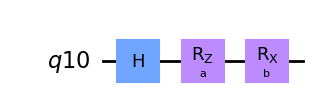

In [20]:
a = Parameter('a')
b = Parameter('b')
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.rz(a, q[0])
qc.rx(b, q[0])

display(qc.draw('mpl', style="clifford"))

# Instantiate the Hamiltonian observable 2X+Z
H = SparsePauliOp.from_list([("X", 2), ("Z", 1)])

# Parameter list
params = [[np.pi / 4, 0]]


In [5]:
from qiskit.primitives import Estimator
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient

# Define the estimator
estimator = Estimator()
# Define the gradient
gradient = ParamShiftEstimatorGradient(estimator)

# Evaluate the gradient of the circuits using parameter shift gradients
pse_grad_result = gradient.run(qc, H, params).result().gradients

print("State estimator gradient computed with parameter shift", pse_grad_result)

State estimator gradient computed with parameter shift [array([-1.41421356,  0.70710678])]


/Users/mac/workspace/quantum-journey/QUANTUM-CLASSICAL-TRANSLATION/venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


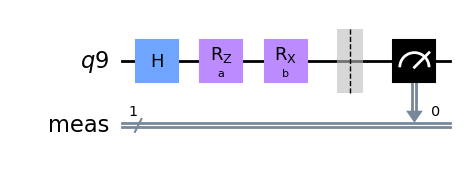

In [13]:
a = Parameter("a")
b = Parameter("b")

q = QuantumRegister(1)
qc_sample = QuantumCircuit(q)
qc_sample.h(q)
qc_sample.rz(a, q[0])
qc_sample.rx(b, q[0])
qc_sample.measure_all()  # important for sampler

qc_sample.draw("mpl")

In [18]:
from qiskit.primitives import Sampler
from qiskit_algorithms.gradients import ParamShiftSamplerGradient

param_vals = [[np.pi / 4, np.pi / 2]]
sampler = Sampler()
gradient = ParamShiftSamplerGradient(sampler)
pss_grad_result = gradient.run(qc_sample, param_vals).result().gradients
print("State sampler gradient computed with parameter shift", pss_grad_result)

State sampler gradient computed with parameter shift [[{0: 0.35355339059327373, 1: -0.35355339059327384}, {0: 0.0, 1: 0.0}]]


In [21]:
from qiskit_algorithms.gradients import LinCombEstimatorGradient

# Evaluate the gradient of the circuits using linear combination of unitaries
state_grad = LinCombEstimatorGradient(estimator)

# Evaluate the gradient
lce_grad_result = state_grad.run(qc, H, params).result().gradients
print("State estimator gradient computed with the linear combination method", lce_grad_result)

State estimator gradient computed with the linear combination method [array([-1.41421356,  0.70710678])]


In [22]:
from qiskit_algorithms.gradients import FiniteDiffEstimatorGradient

state_grad = FiniteDiffEstimatorGradient(estimator, epsilon=0.001)

# Evaluate the gradient
fde_grad_result = state_grad.run(qc, H, params).result().gradients
print("State estimator gradient computed with finite difference", fde_grad_result)

State estimator gradient computed with finite difference [array([-1.41421333,  0.70710666])]


      ┌───┐┌───────────────────┐                        
 q_0: ┤ X ├┤0                  ├────────────────────────
      ├───┤│                   │                        
 q_1: ┤ X ├┤1                  ├────────────────────────
      └───┘│                   │                        
 q_2: ─────┤2                  ├────────────────────────
      ┌───┐│                   │                        
 q_3: ┤ X ├┤3                  ├────────────────────────
      ├───┤│                   │                        
 q_4: ┤ X ├┤4                  ├────────────────────────
      ├───┤│                   │                        
 q_5: ┤ X ├┤5                  ├────────────────────────
      └───┘│                   │                        
 q_6: ─────┤6                  ├────────────────────────
      ┌───┐│                   │                        
 q_7: ┤ X ├┤7                  ├────────────────────────
      └───┘│   RGQFTMultiplier │┌─┐                     
 q_8: ─────┤8                  